# FORECAST OF THE INFLATION IN HAITI FROM 2020 TO 2022

### By : Chasnick Desir
##### Saturday , September 11, 2021

INTRODUCTION

    A.	Background
    B.	Problem 
    C.	Audience
    
RESEARCH PROBLEM

HYPOTHESES

DATA SOURCES

I.DATA WRANGLING

    A. Data Loading & Cleaning
    B. Data Transformation
    C. Functions

II.EXPLORATORY DATA ANALYSIS

    A.Descriptive Analysis
    B.Bivariate Analysis
    
III.MULTIVARIATE TIME SERIES ANALYSIS

    III. 1.-MULTIVARIATE TIME SERIES ANALYSIS ANALYSIS (WITH MONTHLY US IMPORT-EXPORT TO HAITI)
    
        A.Stationarity
        B.Long-Term Correlations
        C.Modelling & Forecasting
   
    III. 2.MULTIVARIATE TIME SERIES ANALYSIS ANALYSIS (WITHOUT MONTHLY US IMPORT-EXPORT TO HAITI)
   
        A.Stationarity
        B.Long-Term Correlations
        C.Modelling & Forecasting

IV.	ANALYTICAL MODELS
    
    A.	Document techniques 
    B.	Document uncertainties
    C.	Performance of different models


V.	DISCUSSION AND CONCLUSION

    A.	Solution to the problem
    B.	Further directions


### INTRODUCTION

For several years we have been witnessing a quasi-cyclical rise in the prices of consumer goods.
In economics, this global and continuous increase is called inflation.
Public policies should be aimed at limiting this inflation, but we are witnessing the impotence of public authorities and the non-result of the applied public policies.

We see fluctuations every time the dollar rises, or gas prices at the pump.
As a DataAnalyst and a Haitian citizen, I asked myself what my contribution to the fight against inflation could be.

It occurred to me to try to predict the future variation of the inflation rate in Haiti over the next few months.

A prediction of this macro indicator will allow companies and investors to prepare for these possible variations, to integrate these variations in their economic decisions.
This forecast will be able to bring elements of solutions in their fight against inflation if it is heard by the public authorities.


# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

-A positive change in the money supply leads to a positive change in the inflation rate.

-An increase in the exchange rate leads to a positive change in the inflation rate.

-A positive correlation between the BRH policy rate and the inflation rate.

-(A positive correlation between the fluctuation of the trade balance and the inflation rate).

# Data Source

All data were collected on a monthly basis.
The variables collected are:
        
         -The USD-HTG Exchange Rate: `end_rate`, which represents the value of 1 US Dollar in terms of Haitian Gourdes at the end of each month;
        
         -The USA's Imports from Haiti and the USA's Exports to Haiti: `us_imp_ht` and `us_exp_ht`, which represent respectively values in US dollars of US' Imports and Exports with Haiti. Those Imports and Exports have been used as a proxy for the Real GDP, whose records of Monthly values couldn't be found. Actually, 76% of Haiti's GDP is imputable to its trade with other countries [(World Bank, 2018)](https://import-export.societegenerale.fr/en/country/haiti/trade-country-risk). The USA are Haiti's first trade partner, with 84% of Haitian Exports heading straight to the USA and 20% of Haitian Exports (the highest), coming from the USA. 
        
         -Inflation: `inf`, which is the percent change in Haiti's Consumer Price Index, relative to same month of previous year.

         -M3 : Money supply including M2 and deposits in Dollars.
            
Data Source:
+ [Haiti's Central Bank](brh.ht)

Haitian Central Bank are supposed to be run by experts, to produce and collect relevant economic data in Haiti in order to make them available and open to anyone who need to make any research. They definitely should be trusted on being reliable. In the next sections, the data will loaded, cleaned and analyzed.

# Data Cleaning
    Review data types
    Analytical Transformations
    Treatment of Missing Values

I.DATA WRANGLING

Lets's start importing necessary packages

In [1]:
#Packages for reading and data manipulation
import pandas as pd
import numpy as np

In [2]:
#Import data
agregat=pd.read_excel("agregatsmon.xls")
TxDirecteur=pd.read_excel("Book2-Tx d'interetsdirecteurdelabrh.xlsx")
Import_Export=pd.read_excel("Monthly-US Import_Export To Haiti.xlsx")

In [3]:
#Read data
agregat

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,INDICATEURS DE DOLLARISATION,NaN,NaN,NaN,NaN
1,NaN,M1,M2,M3,NaN,M1,M2,M3,NaN,TAUX DE CHANGE BRH,...,Avoirs Extér.nets Système banc (millions de Gd...,Avoirs Extér.Bruts Bques. Commerc. (millions d...,Engagem. Extér. Bques. Commerc. (millions de G...,Avoirs Extér.Nets Bques. Commerc. (millions de...,NaN,Dépot $/Dép.tot.,Crédit $/Dépot $,Crédit $/Crédit total,Dépot $/M3,NaN
2,Date,( En millions de gourdes ),NaN,NaN,NaN,( En millions de dollars É.U. ),NaN,NaN,NaN,(Fin de période),...,( En millions de Gdes ),( En millions de Gdes ),( En millions de Gdes ),( En millions de Gdes ),NaN,( En pourcentage ),( En pourcentage ),( En pourcentage ),( En pourcentage ),NaN
3,1958-09-01 00:00:00,90.0407,122.1179,NaN,NaN,18.00814,24.42358,NaN,NaN,5,...,3.8306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959-09-01 00:00:00,85.6913,119.3291,NaN,NaN,17.13826,23.86582,NaN,NaN,5,...,-12.5101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,M3: Masse monétaire incluant M2 et les dépôts ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,DAV= dépôts à vue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,DE= dépôts dépargne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,DT=dépôts totaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop unnecessary rows
agregat= agregat.drop(labels=[0], axis=0)
agregat= agregat.drop(labels=[1,2,509,510,511,512,513,514], axis=0)
agregat= agregat.drop(labels=[505,506,507,508], axis=0)

#Rename columns
agregat.rename(columns= {"Unnamed: 9" : "ChangeRate", "Unnamed: 3" : "M3" , "Unnamed: 0" : "Date" , "Unnamed: 23": "InflationRate" }, inplace=True)

In [5]:
#Select relevant columns
agregat1=agregat[['Date','M3','ChangeRate','InflationRate']]

In [6]:
#Drop NaN rows
agregat1.dropna(subset = ["M3",'ChangeRate','InflationRate'], inplace=True)

<ipython-input-6-ba243150f062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1.dropna(subset = ["M3",'ChangeRate','InflationRate'], inplace=True)


In [7]:
#Convert data columns type in columns int64
agregat1['M3']=agregat1['M3'].astype('float64')
agregat1['ChangeRate']=agregat1['ChangeRate'].astype('float64')
agregat1['InflationRate']=agregat1['InflationRate'].astype('float64')

#Show dataframe
agregat1

<ipython-input-7-4da13ee5b206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1['M3']=agregat1['M3'].astype('float64')
<ipython-input-7-4da13ee5b206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1['ChangeRate']=agregat1['ChangeRate'].astype('float64')
<ipython-input-7-4da13ee5b206>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Date,M3,ChangeRate,InflationRate
169,1992-09-01 00:00:00,6197.900000,10.1780,17.57
170,1992-10-01 00:00:00,6380.500000,10.5090,16.93
171,1992-11-01 00:00:00,6506.700000,11.3540,15.73
172,1992-12-01 00:00:00,6864.500000,10.9530,15.92
173,1993-01-01 00:00:00,7013.751400,11.6500,16.37
...,...,...,...,...
499,2020-03-30 00:00:00,407524.171420,97.9728,22.00
500,2020-04-30 00:00:00,427783.389260,102.8348,22.30
501,2020-05-31 00:00:00,447677.408120,108.9426,23.40
502,2020-06-30 00:00:00,466234.701919,113.3133,24.80


In [8]:
#Set end date
agregat1['Date'] = pd.date_range(start='Sep 1992', periods = len(agregat1), freq='M')

<ipython-input-8-100cac66bfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1['Date'] = pd.date_range(start='Sep 1992', periods = len(agregat1), freq='M')


In [9]:
#Set columns Date as index

agregat1.set_index('Date', inplace=True)
agregat1

,M3,ChangeRate,InflationRate
Date,,,
1992-09-30,6197.900000,10.1780,17.57
1992-10-31,6380.500000,10.5090,16.93
1992-11-30,6506.700000,11.3540,15.73
1992-12-31,6864.500000,10.9530,15.92
1993-01-31,7013.751400,11.6500,16.37
...,...,...,...
2020-03-31,407524.171420,97.9728,22.00
2020-04-30,427783.389260,102.8348,22.30
2020-05-31,447677.408120,108.9426,23.40


In [10]:
#Show TxDirecteur dataset
TxDirecteur

,Unnamed: 0,Unnamed: 1
0,Taux nominal sur Bons BRH,NaN
1,NaN,NaN
2,Date,Taux des bonds a 91 Jours
3,1996-12-30 00:00:00,0.194
4,1997-01-30 00:00:00,0.172
...,...,...
854,NaN,NaN
855,2020-10-30 00:00:00,0.1
856,NaN,NaN
857,NaN,NaN


In [11]:
#drop unnecessary rows
TxDirecteur= TxDirecteur.drop(labels=[0,1,2], axis=0)
#Rename columns
TxDirecteur.rename(columns= {"Unnamed: 0" : "Date", "Unnamed: 1" : "PoliciesRate"}, inplace=True)
TxDirecteur

,Date,PoliciesRate
3,1996-12-30 00:00:00,0.194
4,1997-01-30 00:00:00,0.172
5,1997-02-27 00:00:00,0.157
6,1997-03-30 00:00:00,0.153
7,1997-04-30 00:00:00,0.179
...,...,...
854,NaN,NaN
855,2020-10-30 00:00:00,0.1
856,NaN,NaN
857,NaN,NaN


In [12]:
#Multiply Policies rate by 100 in prevision to logarithmic uses
TxDirecteur['PoliciesRate']=(TxDirecteur['PoliciesRate']*100)

In [13]:
#Convert data columns type to datetime
#TxDirecteur['Date']= pd.to_datetime(TxDirecteur['Date'])
TxDirecteur['Date']=TxDirecteur['Date'].astype('datetime64')

#Convert data columns type in columns int64
TxDirecteur['PoliciesRate']=TxDirecteur['PoliciesRate'].astype('float64')

TxDirecteur

,Date,PoliciesRate
3,1996-12-30,19.4
4,1997-01-30,17.2
5,1997-02-27,15.7
6,1997-03-30,15.3
7,1997-04-30,17.9
...,...,...
854,NaT,NaN
855,2020-10-30,10.0
856,NaT,NaN
857,NaT,NaN


In [14]:
#Drop NaN rows
TxDirecteur.dropna(subset = ["Date", "PoliciesRate"], inplace=True)

In [15]:
#Set end date
TxDirecteur['Date'] = pd.date_range(start='Dec 1996', periods = len(TxDirecteur), freq='M')

In [16]:
#Set columns Date as index
TxDirecteur= TxDirecteur.set_index('Date') #or use df.set_index('Date', inplace=True) 
TxDirecteur

,PoliciesRate
Date,
1996-12-31,19.4
1997-01-31,17.2
1997-02-28,15.7
1997-03-31,15.3
1997-04-30,17.9
...,...
2020-07-31,10.0
2020-08-31,10.0
2020-09-30,10.0


In [17]:
Import_Export

,date,US_IMP_HT,US_EXP_HT
0,1985M1,31.200000,31.200000
1,1985M2,30.400000,31.800000
2,1985M3,36.700000,31.900000
3,1985M4,33.200000,32.900000
4,1985M5,31.000000,35.300000
...,...,...,...
422,2020M3,89.632097,121.447966
423,2020M4,33.779661,98.304938
424,2020M5,31.120985,138.548968
425,2020M6,58.066942,86.973292


In [18]:
#Convert data in millions USD
Import_Export['US_IMP_HT'] = Import_Export['US_IMP_HT']*(10**6)
Import_Export['US_EXP_HT'] = Import_Export['US_EXP_HT']*(10**6)
Import_Export

,date,US_IMP_HT,US_EXP_HT
0,1985M1,31200000.0,31200000.0
1,1985M2,30400000.0,31800000.0
2,1985M3,36700000.0,31900000.0
3,1985M4,33200000.0,32900000.0
4,1985M5,31000000.0,35300000.0
...,...,...,...
422,2020M3,89632097.0,121447966.0
423,2020M4,33779661.0,98304938.0
424,2020M5,31120985.0,138548968.0
425,2020M6,58066942.0,86973292.0


In [19]:
#Make Colunms date in format comprehensible for computer
Import_Export['date'] = pd.date_range(start='Jan 1985', periods = len(Import_Export), freq='M')

In [20]:
#Drop NaN rows
Import_Export.dropna(subset = ["date", "US_IMP_HT",'US_EXP_HT'], inplace=True)

In [21]:
#Set date as index for Import_Export DataFrame
Import_Export.set_index('date', inplace=True)
Import_Export

,US_IMP_HT,US_EXP_HT
date,,
1985-01-31,31200000.0,31200000.0
1985-02-28,30400000.0,31800000.0
1985-03-31,36700000.0,31900000.0
1985-04-30,33200000.0,32900000.0
1985-05-31,31000000.0,35300000.0
...,...,...
2020-02-29,79661596.0,100645336.0
2020-03-31,89632097.0,121447966.0
2020-04-30,33779661.0,98304938.0


In [22]:
##Create definitive dataset
Inf_Forecast = pd.concat([agregat1, TxDirecteur, Import_Export], axis=1)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT
1985-01-31,NaN,NaN,NaN,NaN,31200000.0,31200000.0
1985-02-28,NaN,NaN,NaN,NaN,30400000.0,31800000.0
1985-03-31,NaN,NaN,NaN,NaN,36700000.0,31900000.0
1985-04-30,NaN,NaN,NaN,NaN,33200000.0,32900000.0
1985-05-31,NaN,NaN,NaN,NaN,31000000.0,35300000.0
...,...,...,...,...,...,...
2020-07-31,496401.876294,119.6664,25.7,10.0,NaN,NaN
2020-08-31,NaN,NaN,NaN,10.0,NaN,NaN
2020-09-30,NaN,NaN,NaN,10.0,NaN,NaN
2020-10-31,NaN,NaN,NaN,10.0,NaN,NaN


In [23]:
#Drop NaN rows from definitive dataframe
Inf_Forecast.dropna(subset = ["US_IMP_HT",'US_EXP_HT','M3', 'ChangeRate',"InflationRate", "PoliciesRate"], inplace=True)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT
1996-12-31,14708.789700,15.0928,14.607501,19.4,13900000.0,34600000.0
1997-01-31,14921.796700,16.2599,15.074644,17.2,8400000.0,33200000.0
1997-02-28,14931.797100,16.1117,15.185226,15.7,12000000.0,36100000.0
1997-03-31,15432.994500,16.5056,16.874242,15.3,14500000.0,40700000.0
1997-04-30,15478.822900,16.6913,16.384732,17.9,16400000.0,40200000.0
...,...,...,...,...,...,...
2020-02-29,391545.303564,94.3711,20.800000,15.0,79661596.0,100645336.0
2020-03-31,407524.171420,97.9728,22.000000,10.0,89632097.0,121447966.0
2020-04-30,427783.389260,102.8348,22.300000,10.0,33779661.0,98304938.0
2020-05-31,447677.408120,108.9426,23.400000,10.0,31120985.0,138548968.0


In [24]:
#Make Import/Export columns in Gourdes
Inf_Forecast["IMP_HT"]=(Inf_Forecast['US_IMP_HT']*Inf_Forecast['ChangeRate'])
Inf_Forecast['EXP_HT']= (Inf_Forecast['US_EXP_HT']*Inf_Forecast['ChangeRate'])
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT,IMP_HT,EXP_HT
1996-12-31,14708.789700,15.0928,14.607501,19.4,13900000.0,34600000.0,2.097899e+08,5.222109e+08
1997-01-31,14921.796700,16.2599,15.074644,17.2,8400000.0,33200000.0,1.365832e+08,5.398287e+08
1997-02-28,14931.797100,16.1117,15.185226,15.7,12000000.0,36100000.0,1.933404e+08,5.816324e+08
1997-03-31,15432.994500,16.5056,16.874242,15.3,14500000.0,40700000.0,2.393312e+08,6.717779e+08
1997-04-30,15478.822900,16.6913,16.384732,17.9,16400000.0,40200000.0,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...,...
2020-02-29,391545.303564,94.3711,20.800000,15.0,79661596.0,100645336.0,7.517752e+09,9.498011e+09
2020-03-31,407524.171420,97.9728,22.000000,10.0,89632097.0,121447966.0,8.781508e+09,1.189860e+10
2020-04-30,427783.389260,102.8348,22.300000,10.0,33779661.0,98304938.0,3.473725e+09,1.010917e+10
2020-05-31,447677.408120,108.9426,23.400000,10.0,31120985.0,138548968.0,3.390401e+09,1.509388e+10


In [25]:
#Make columns M3 in millions gourdes
Inf_Forecast['M3']=Inf_Forecast['M3']*(10**6)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT,IMP_HT,EXP_HT
1996-12-31,1.470879e+10,15.0928,14.607501,19.4,13900000.0,34600000.0,2.097899e+08,5.222109e+08
1997-01-31,1.492180e+10,16.2599,15.074644,17.2,8400000.0,33200000.0,1.365832e+08,5.398287e+08
1997-02-28,1.493180e+10,16.1117,15.185226,15.7,12000000.0,36100000.0,1.933404e+08,5.816324e+08
1997-03-31,1.543299e+10,16.5056,16.874242,15.3,14500000.0,40700000.0,2.393312e+08,6.717779e+08
1997-04-30,1.547882e+10,16.6913,16.384732,17.9,16400000.0,40200000.0,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...,...
2020-02-29,3.915453e+11,94.3711,20.800000,15.0,79661596.0,100645336.0,7.517752e+09,9.498011e+09
2020-03-31,4.075242e+11,97.9728,22.000000,10.0,89632097.0,121447966.0,8.781508e+09,1.189860e+10
2020-04-30,4.277834e+11,102.8348,22.300000,10.0,33779661.0,98304938.0,3.473725e+09,1.010917e+10
2020-05-31,4.476774e+11,108.9426,23.400000,10.0,31120985.0,138548968.0,3.390401e+09,1.509388e+10


In [26]:
#Drop non-necessary columns as US_IMP_HT/US_EXP_HT
Inf_Forecast.drop(['US_IMP_HT','US_EXP_HT'], axis = 1, inplace=True)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...
2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


In [27]:
#Export Dataset
#Inf_Forecast.to_excel('Forecast.xlsx')

Transform data to neperian logarithmic scale and store as lodgf. First , i check if there is any null or negative values.

In [28]:
# First we check if any value is negative or null
Inf_Forecast[Inf_Forecast.iloc[:,1:]<=0].count()

M3               0
ChangeRate       0
InflationRate    7
PoliciesRate     0
IMP_HT           0
EXP_HT           0
dtype: int64

In [29]:
#Reset dataframe Index
Inf_reset=Inf_Forecast.reset_index()
Inf_reset

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1,1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
2,1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
3,1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
4,1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...
278,2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
279,2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
280,2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
281,2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


In [30]:
#Identify negative InflationRate rows
# get names of indexes for which
# column InflationRate has negative value

Negative = Inf_reset[ Inf_reset['InflationRate'] <0 ].head(10)
Negative

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
149,2009-05-31,9.559570e+10,40.816200,-0.373367,6.0,2.106283e+09,3.159032e+09
150,2009-06-30,9.777979e+10,41.159600,-1.047443,5.0,2.322292e+09,2.369395e+09
151,2009-07-31,9.840801e+10,41.448183,-2.484848,5.0,2.277892e+09,3.024977e+09
152,2009-08-31,9.934983e+10,41.433523,-2.800000,5.0,2.104256e+09,2.664261e+09
153,2009-09-30,1.030114e+11,41.773717,-4.700000,5.0,2.068130e+09,2.511386e+09
154,2009-10-31,1.027515e+11,42.027071,-3.482881,5.0,1.871110e+09,2.663701e+09
155,2009-11-30,1.018583e+11,42.027071,-0.785973,5.0,1.932918e+09,2.802145e+09


Remove negative InflationRate rows to be able use neperian logaritmic transformation.

In [31]:
#drop unnecessary rows
Inf_reset= Inf_reset.drop(labels=[149,150,151,152,153,154,155], axis=0)
Inf_reset

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1,1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
2,1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
3,1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
4,1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...
278,2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
279,2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
280,2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
281,2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


In [32]:
#Rename index columns as date
Inf_reset.rename(columns={"index": "Date"} , inplace=True)


In [33]:
#reset columns date as index
#Show manipulation
#Inf_reset.set_index('Date',inplace= True)
#Inf_reset

In [34]:
#Reset index for Inf_Forecast Dataset
#Inf_Forecast=Inf_Forecast.reset_index()
#Inf_Forecast

In [35]:
#Found len Inf_reset
len(Inf_reset)

276

In [36]:
#Create dataframe in neperian logarithm scale
Inf_Reset_log=np.log(Inf_reset.groupby('Date').mean())
Inf_Reset_log

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
1996-12-31,23.411711,2.714218,2.681535,2.965273,19.161617,20.073582
1997-01-31,23.426089,2.788702,2.713014,2.844909,18.732444,20.106762
1997-02-28,23.426759,2.779546,2.720323,2.753661,19.079963,20.181349
1997-03-31,23.459774,2.803700,2.825788,2.727853,19.293359,20.325438
1997-04-30,23.462739,2.814888,2.796350,2.884801,19.427680,20.324265
...,...,...,...,...,...,...
2020-02-29,26.693367,4.547235,3.034953,2.708050,22.740533,22.974348
2020-03-31,26.733366,4.584690,3.091042,2.302585,22.895914,23.199686
2020-04-30,26.781883,4.633124,3.104587,2.302585,21.968493,23.036709


### Create function for ease of task

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

# Create function for making subplots

def viz(Inf_Forecast, size=(15,15), row=3, col=2, rotation=90, title=False, xlab=False, ylab=False, name=None):
    fig = plt.figure(figsize=size)
    fig.subplots_adjust(hspace=0.4, wspace=0.1)
    
    for i in range(1,len(Inf_Forecast.columns)+1):
        ax = fig.add_subplot(row, col, i)
        if title==False:
            ax.set_title(Inf_Forecast.columns[i-1])
        else:
            ax.set_title(title[i-1], size=16)

        if xlab==False:
            ax.set_xlabel(None)
        else:
            ax.set_xlabel(xlab, size=14)
    
        if ylab==False:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel(ylab, size=14)
                
        plt.plot(Inf_Forecast.iloc[:,i-1])
           
        ax.set_xticks(Inf_Forecast.index)
        ax.set_xticklabels(labels=(Inf_Forecast.index), rotation=rotation)

    plt.gcf()
    plt.savefig(name, bbox_inches='tight', transparent=False)
    plt.show()

In [38]:
def viz_stack(data=Inf_Reset_log, size=(20,10), col1='', col2='', col3=None,
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='Inflation Rate', s2='Exchange Rate', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 1.- Evolution of Exchange and Inflation rates', 
            name='graphs/end_rate-inf'):
    
    '''Function for building stacked line graphs'''
    
    
    plt.figure(figsize=size)
    
    if col3 == None:
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col2], linewidth=3)

        plt.xticks(data.index, rotation=45, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()
        
    else:
        plt.plot(data[col2], linewidth=3)
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col3], linewidth=3)

        plt.xticks(data.index, rotation=90, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)
        plt.text(x=x3, y=y3, s=s3, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()

### II. EXPLORATORY DATA ANALYSIS <a name="eda"></a>

 This study will allow us, through the joint analysis of the inflation rate and the other variables, to understand how the evolution of one affects the evolution of the other.

### A. Descriptive Analysis <a name="describe"></a>

We are looking on the series over 276 months of observation: from December 1996 to June 2020.

In [39]:
Inf_reset.describe()

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
count,2.760000e+02,276.000000,276.000000,276.000000,2.760000e+02,2.760000e+02
mean,1.264039e+11,42.668436,12.974166,13.149710,2.427371e+09,3.624961e+09
std,1.053935e+11,19.634502,6.840953,7.572376,2.110395e+09,2.734574e+09
min,1.470879e+10,15.092800,0.062539,3.000000,1.365832e+08,5.222109e+08
25%,3.655110e+10,29.464000,7.924277,7.600000,6.770399e+08,1.476835e+09
50%,8.950740e+10,40.358300,12.450000,12.000000,1.724036e+09,2.799328e+09
75%,1.756651e+11,45.627755,15.942103,18.000000,3.477844e+09,4.720041e+09
max,4.662347e+11,113.313300,38.404605,27.830000,1.165812e+10,1.509388e+10


In [40]:
Inf_reset

,Date,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1,1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
2,1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
3,1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
4,1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...
278,2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
279,2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
280,2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
281,2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


   + The Exchange Rate's value at the end of any month has remained under 49 HTG for 1 USD, from  January 2014 to April 2015; this was under the administration of President Michel J. Martelly and Prime Minister Evans Paul, [with Charles Castel as the Governor of the Central Bank](https://www.brh.ht/discours-dinstallation-du-gouverneur-de-la-brh/). It has remained less than 63 HTG for 1 USD, before August 2016, during [the last period of elections in Haiti](https://fr.wikipedia.org/wiki/%C3%89lection_pr%C3%A9sidentielle_ha%C3%AFtienne_de_2015). It still didn't go beyond 67 HTG for 1 USD until before December 2017, [10 months after President Jovenel Moïse got into duty](https://fr.wikipedia.org/wiki/Jovenel_Mo%C3%AFse) and [2 years after Jean Baden Dubois replaced Governor Charles Castel](https://lenouvelliste.com/article/153722/jean-baden-dubois-remplace-charles-castel-comme-gouverneur-de-la-brh). And finally, the `USD-HTG Exchange Rate` did nothing but keep spiking from January 2018 to nowadays (August 2020), [under President Jovenel Moïse and Governor Jean Baden Dubois](https://www.brh.ht/la-brh/conseil-dadministration/jean-baden-dubois/).Since the last month , we can see the positive trend for the change rate.


   + The country has a mean two-figure positive inflation rate: 12.97% in average, which is bad for the economy, since there is no significant production.


   + The USA imports goods from Haiti for a value of 78.5 million USD monthly, and has exported goods to Haiti for a value of 106.7 million monthly. This is to say that we have maintained an average gap of 28.2 million USD monthly with our first and main business partner.  

   + We also observe that the money supply M3 has been growing during these 276 months.

Now let's visualize the time series.

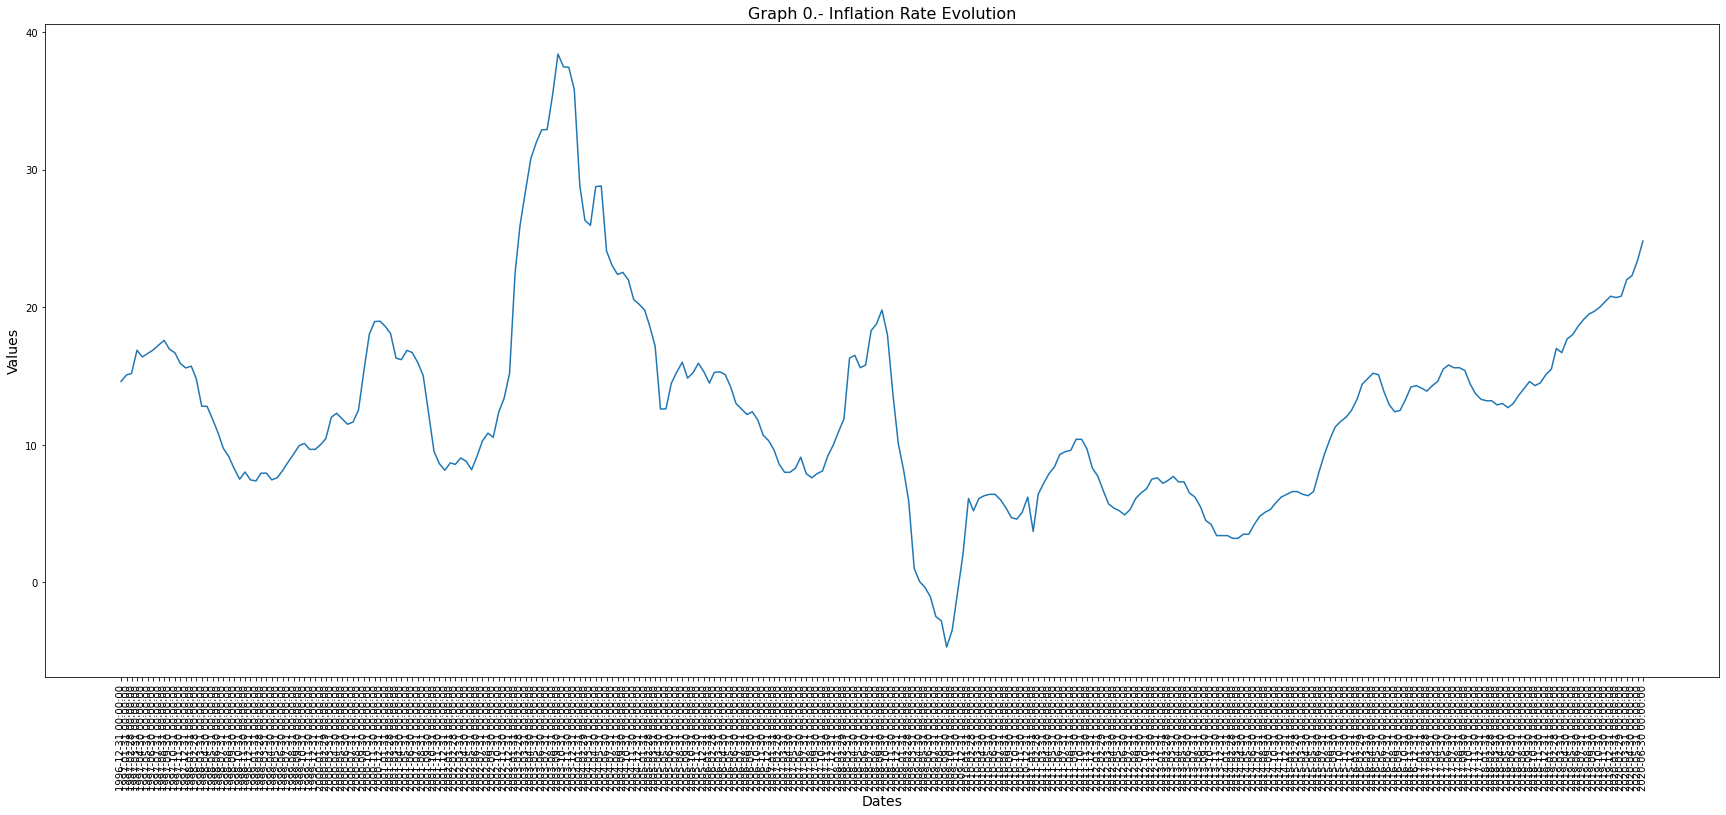

In [41]:
#Visualise Change Rate
viz(Inf_Forecast[['InflationRate']], (30,12), 1, 1, xlab='Dates', ylab='Values', 
    title=['Graph 0.- Inflation Rate Evolution'], 
    name='graphs/Inflation Rate Evolution')

 + We note that the year-on-year inflation rate fluctuates almost randomly. From 1996 to 2020, the highest inflation peak was reached in September 2003. At that time Haiti was facing a popular protest movement following the assassination of Amiot Metayer (https://www.dial-infos.org/09_breves/pays/hi03.html) and reached its lowest level in October 2009. According to the newspaper *Relief Web*, during this period Haiti experienced a drop of about 40% in the price of food products (*National Rice, Corn and others*) consecutive to an increase in the level of transfers. (https://reliefweb.int/report/haiti/ha%C3%AFti-s%C3%A9curit%C3%A9-alimentaire-nette-am%C3%A9lioration-en-octobre-2009)



### B. Bivariate Analysis <a name="bi-anal"></a>

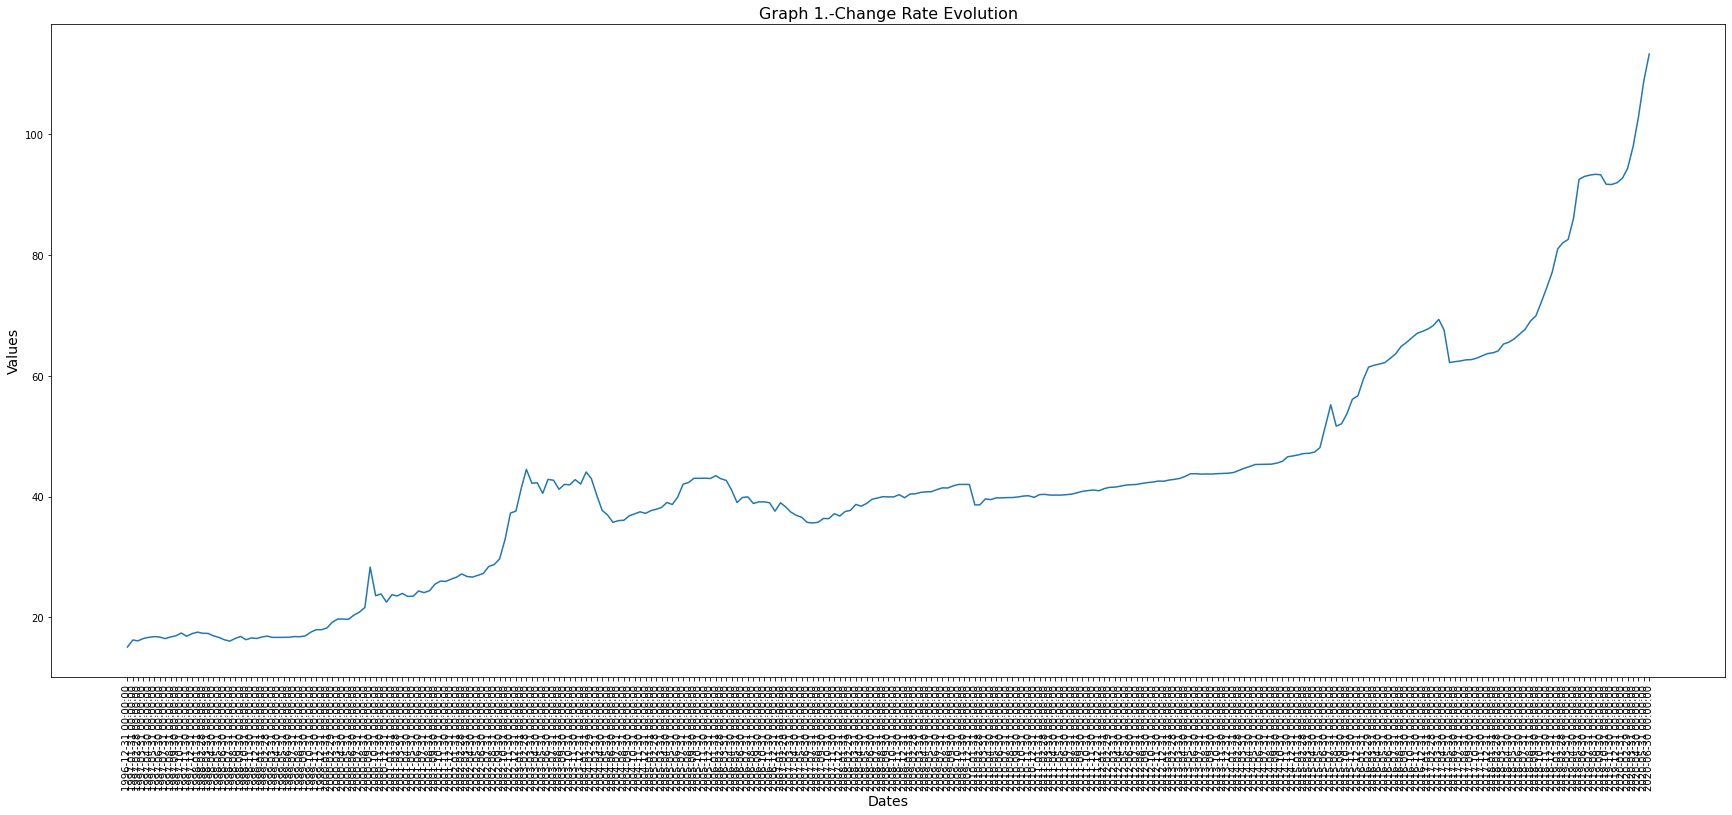

In [42]:
#Visualise Change Rate
viz(Inf_Forecast[['ChangeRate']], (30,12), 1, 1, xlab='Dates', ylab='Values', 
    title=['Graph 1.-Change Rate Evolution'], 
    name='graphs/Change Rate Evolution')

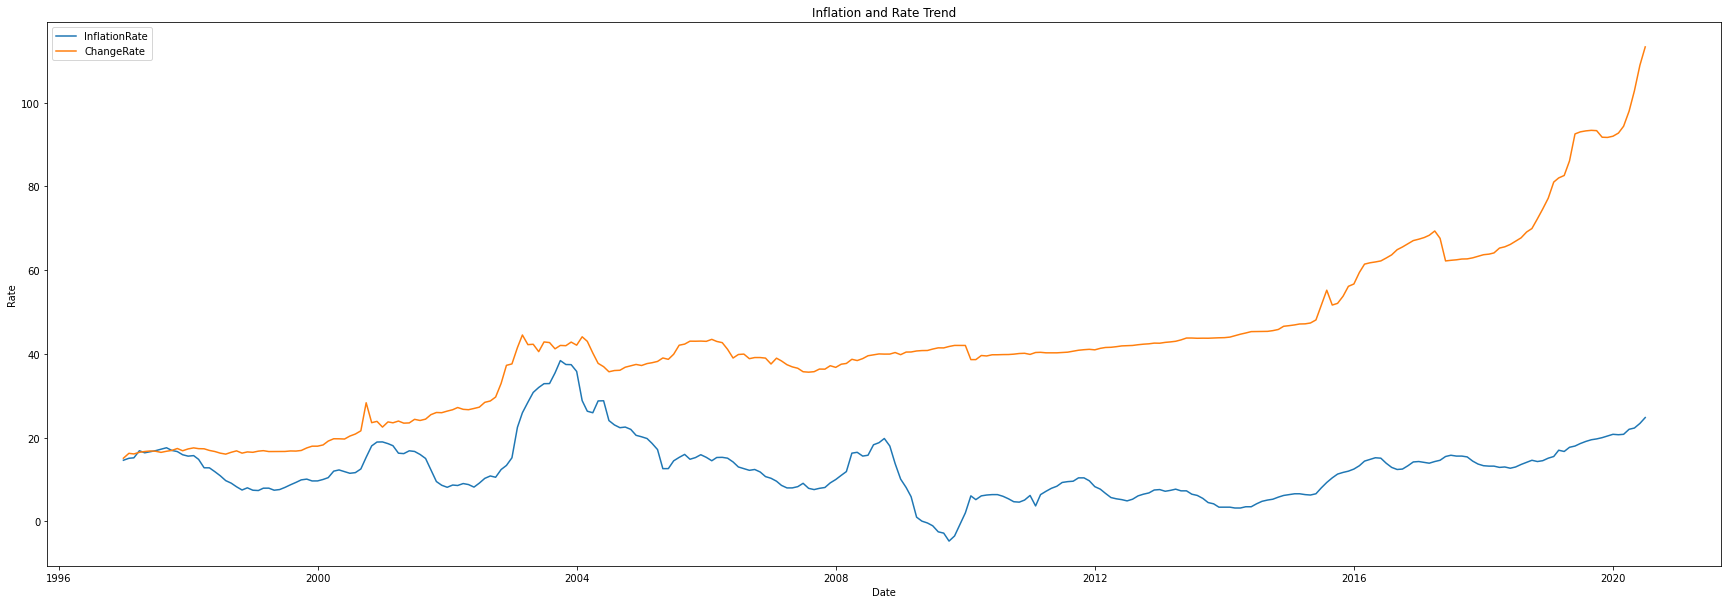

In [43]:
#Visualise Change Rate
#viz(Inf_Forecast[['InflationRate']], (30,12), 1, 1, xlab='Dates', ylab='Values', 
#    title=['Graph 0.- Inflation and Change Rate Evolution'], 
#    name='graphs/Inflation and Rate Evolution')

#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Forecast[['InflationRate', 'ChangeRate']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation and Rate Trend')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend(['InflationRate','ChangeRate'])
plt.show()

Inflation varies the same as the exchange rate, those series are very likely to be positively correlated. This is to say that the inflation tends to be high when the Exchange rate is high and vice versa. 

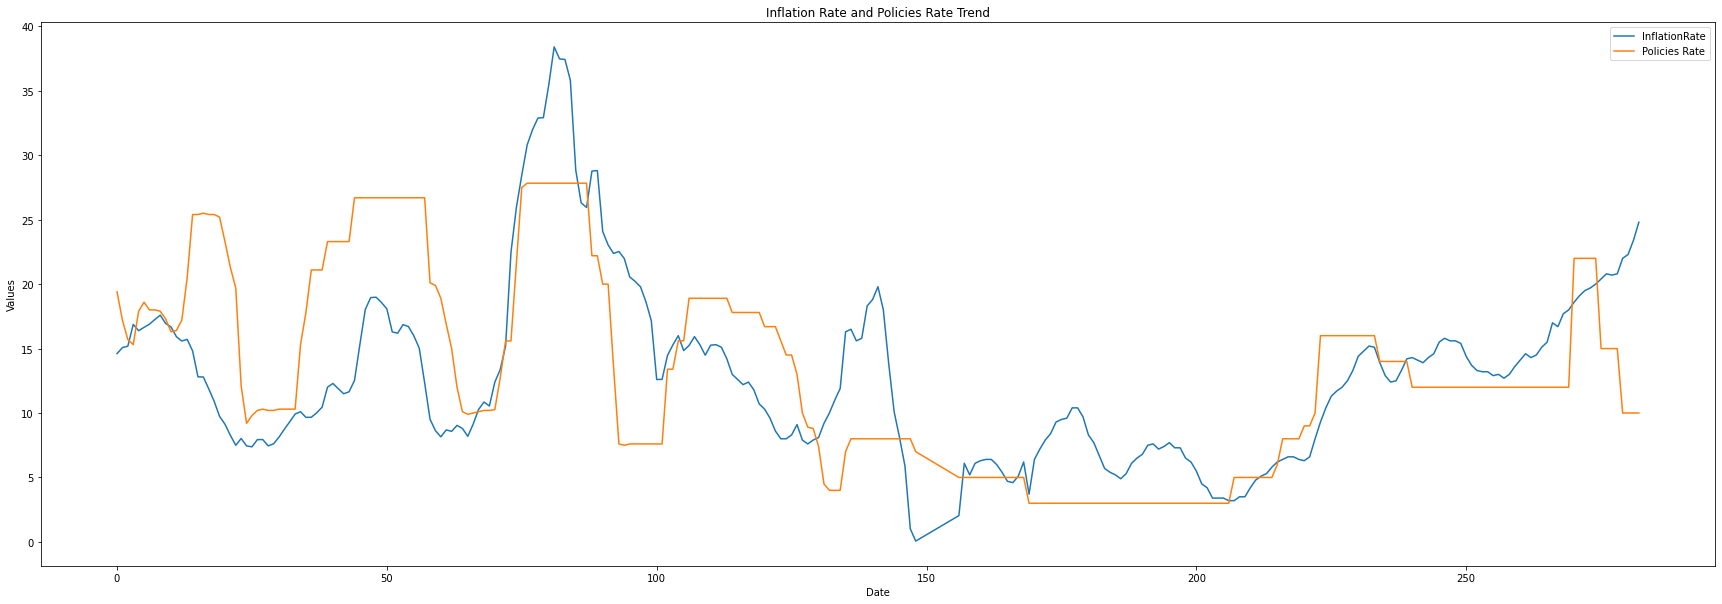

In [44]:
#Visualise Change Rate and Policies rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_reset[['InflationRate', 'PoliciesRate']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation Rate and Policies Rate Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['InflationRate','Policies Rate'])
plt.show()

If at certain times there seems to be positive correlations between the policy rate and the inflation rate, at other times there seems to be a disconnect between the fluctuations of the policy rate and the inflation rate, which indicates that external factors influence the inflation rate in these periods.
Among these external factors we can mention the protests of 2003 and some peaks of foreign transfers as in 2009.

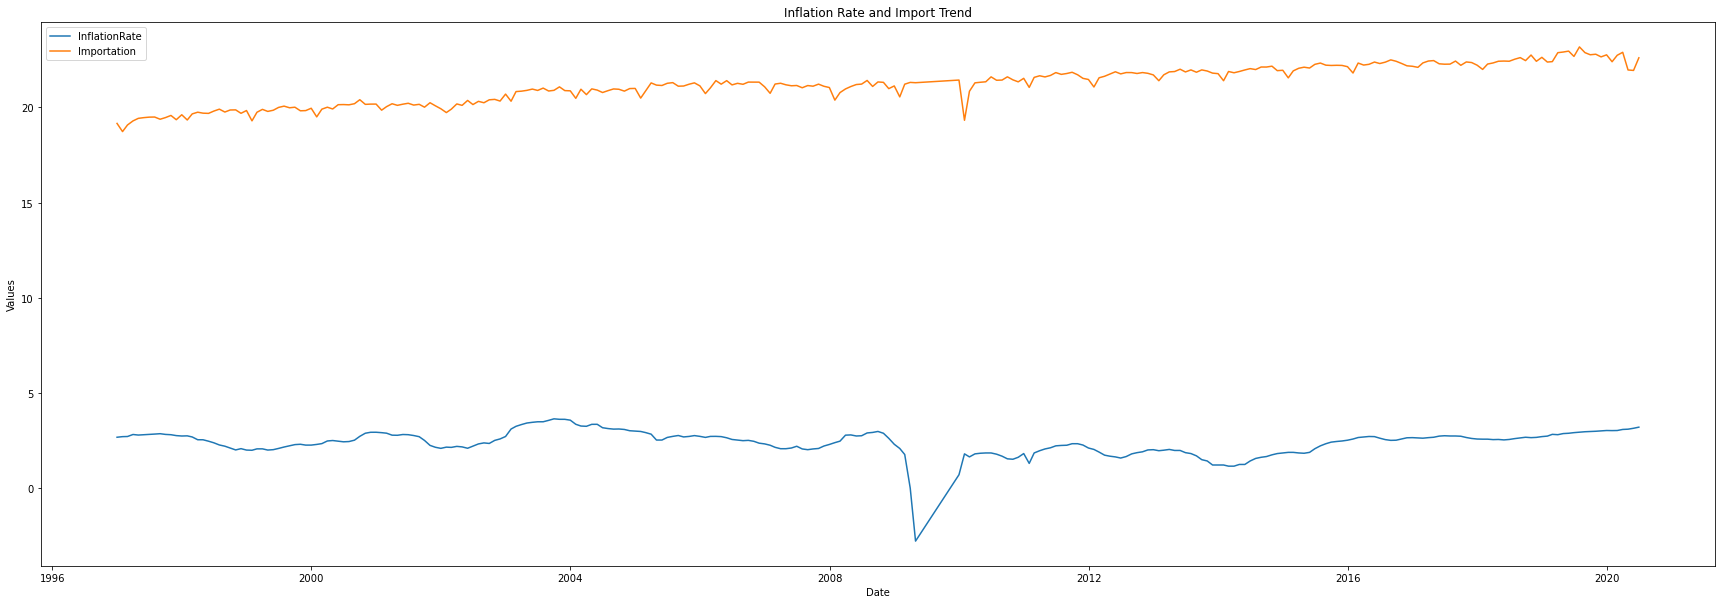

In [45]:
#Visualise Change Rate and Import at Log scale
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Reset_log[['InflationRate', 'IMP_HT']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation Rate and Import Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['InflationRate','Importation'])
plt.show()

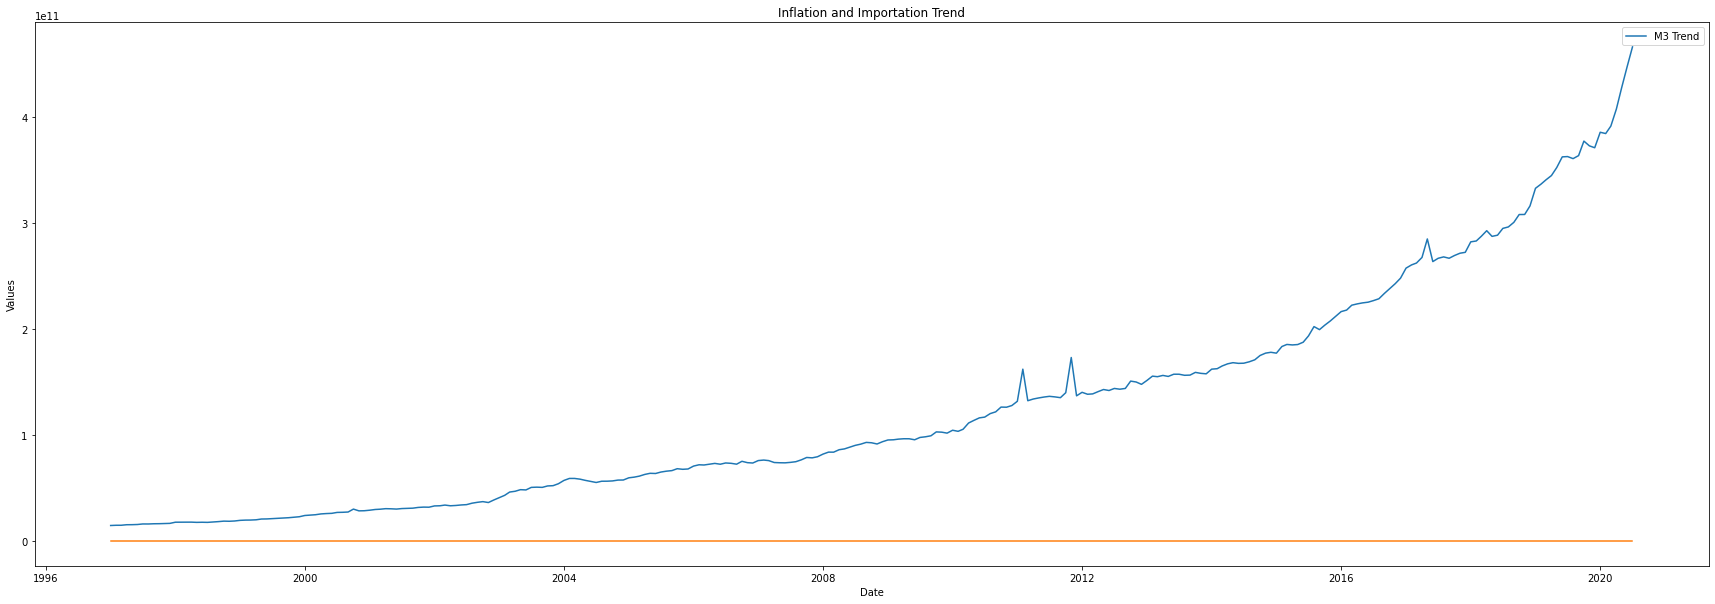

In [46]:
#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Forecast[['M3','InflationRate']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation and Importation Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['M3 Trend'])
plt.show()

The Graph above doesn't give a proper grasp of how inflation rates vary relative to M3, imports and exports, because `InflationRate` is of the order of tens, whereas `IMP_HT`, `EXP_HT` and `M3` are of the order of millions.To resolve this problem, Let's explore these variables on unstacked line graphs instead!

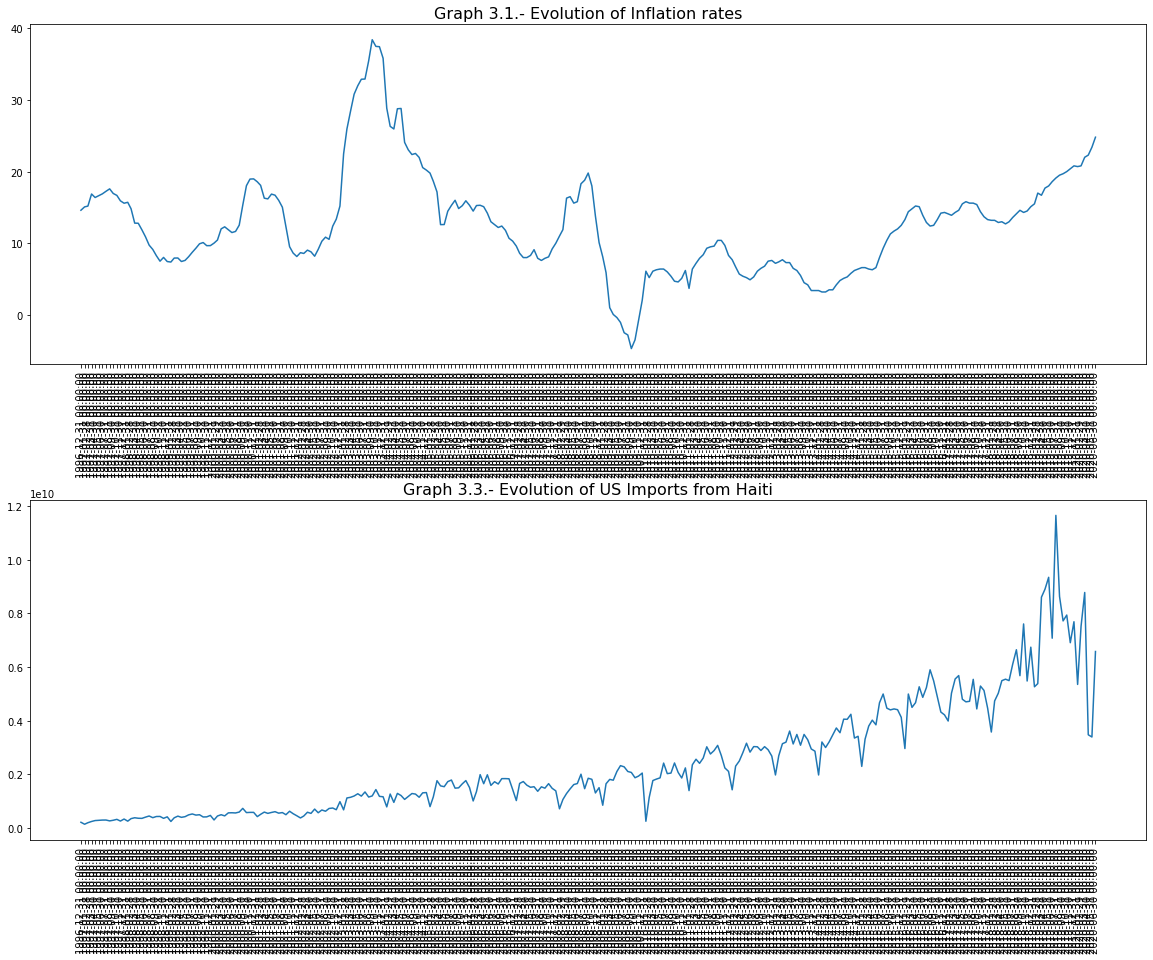

In [50]:
#Inflation Rate and us import
viz(Inf_Forecast[['InflationRate', 'IMP_HT']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Inflation rates', 
             'Graph 3.3.- Evolution of US Imports from Haiti'],
    name='graphs/end_rate-exp')

The first thing to note is the seasonality in the US Imports. A seasonality is a regularity that happens at the very same period of each period group. For example, the USA imports drops dramatically in January of every year, sometimes down to 20M USD.
We can also see some correlation in the upward trends of imports and inflation.

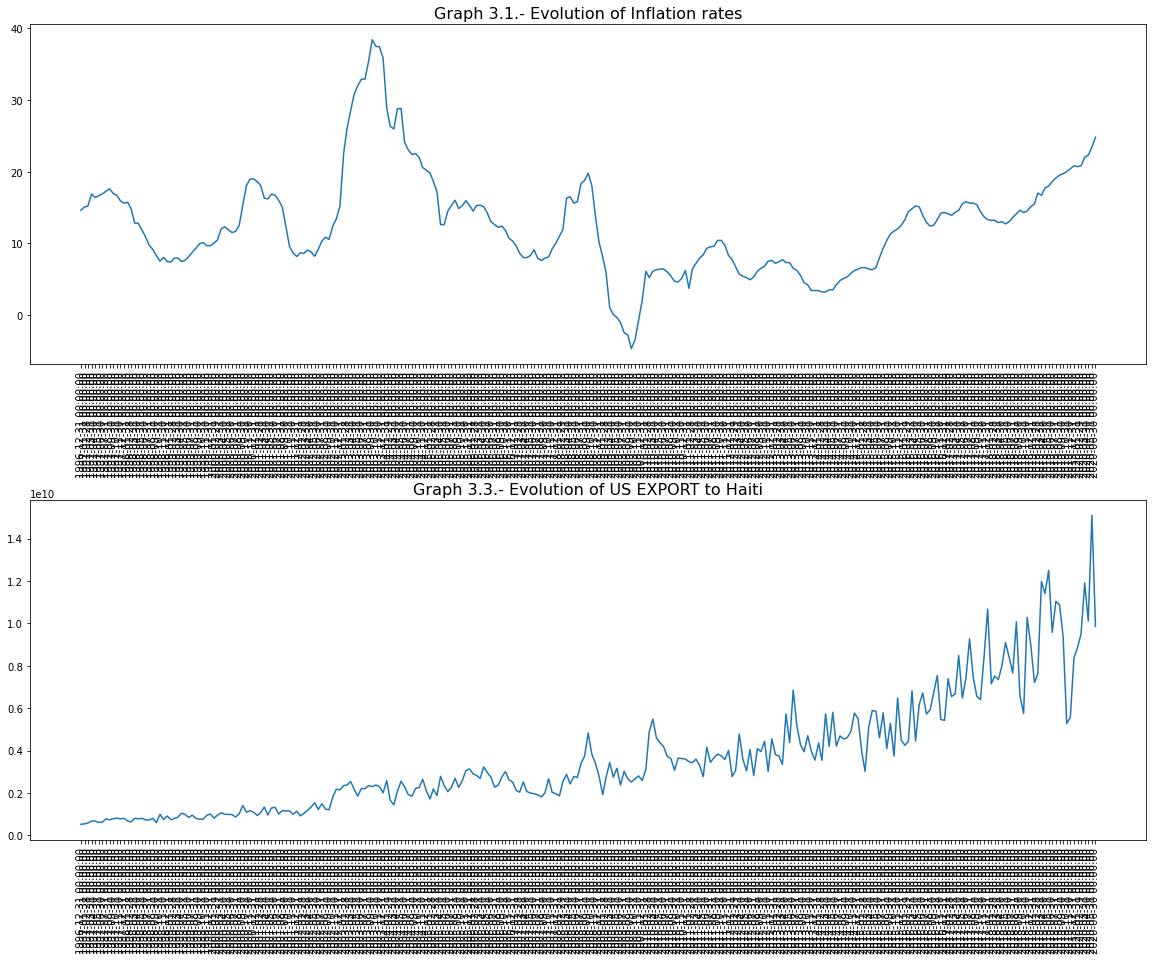

In [51]:
#Inflation Rate and us export
viz(Inf_Forecast[['InflationRate', 'EXP_HT']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Inflation rates', 
             'Graph 3.3.- Evolution of US EXPORT to Haiti'],
    name='graphs/end_rate-imp')

As for the exports, the imports seem to be seized with lows in February. Inflation does not seem to be directly correlated to the level of Haitian imports. 

### III. MULTIVARIATE ANALYSIS <a name="multi-var"></a>

### _III.1.- MULTIVARIATE TIME SERIES ANALYSIS_ <a name="multi-anal"></a>

In the case of time series, the study of linear correlations as described by Pearson is obsolete. Another framework has been provided by Engle, Granger, Johansen, Wold, and other famous econometrist: the hypotheses of causation and cointegration, which accounts for correlation that may occur over time, and lags that induce a non-linear relation between variables. 

### A. Stationarity <a name="stationarity"></a>

A time series is first a mathematical series. To be able to study its properties, it must be converging to some long run stability. This is described as stationarity. Stationarity tests detect whether the series has a unit root, this is to say whether the coefficient of its first lag (as it is regressed on itself) is lesser than one, or not. If it is lesser than one, this means the series tends to converge over time. All other coefficients tend to be lesser than the first root. To evaluate stationarity, we will use **Dickey Fuller**'s sequential tests, starting with the series at level. 

_**Note:** For all that follows, we will use the `Xtrain` dataset because log transformation is recommended in economic series: the coefficients estimated are elasticities! We won't account for the trend. Its presence in the modelization or not is not important to us. `Xtest` for accuracy testing._

In [47]:
import seaborn as sns
#plt.figure(figsize=(15,5))
#sns.lineplot(Inf_reset.index, "InflationRate", ci=None,data=Inf_reset)

In [48]:
#plt.figure(figsize=(15,5))
#sns.lineplot(Inf_reset.index, "ChangeRate", ci=None,data=Inf_reset)

'''''' viz_stack(data=Inf_Reset_log, col1='InflationRate', col2='ChangeRate', col3=None,
            x1='1996-12-31', x2='1996-12-31', x3='1996-12-31',
            y1=4.4, y2=2.8, y3=0,
            s1='Inflation', s2='USD/GDES Exchange Rate', s3='',
            rot1=15, rot2=15, rot3=0,
            title='Graph 1.1.- Evolution of Exchange and Inflation Rates', 
            name='graphs/ChangeRate-InflationRate') 

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?